<a href="https://colab.research.google.com/github/Seyjuti8884/pwskills_assignment/blob/main/KNN_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THEORETICAL QUESTIONS


### **1. What is K-Nearest Neighbors (KNN) and how does it work?**  
KNN is a simple, non-parametric, and instance-based learning algorithm used for classification and regression. It works by identifying the 'K' closest training examples in the feature space to a new data point, based on a distance metric (commonly Euclidean), and makes predictions based on the majority label (classification) or average (regression) of those neighbors.

---

### **2. What is the difference between KNN Classification and KNN Regression?**  
- **KNN Classification** predicts a class label by majority voting among the 'K' nearest neighbors.  
- **KNN Regression** predicts a continuous value by averaging the values of the 'K' nearest neighbors.

---

### **3. What is the role of the distance metric in KNN?**  
The distance metric determines how "close" data points are. Common metrics include:
- **Euclidean distance**: for continuous variables.
- **Manhattan distance**: for high-dimensional data.
- The choice of metric can significantly affect model performance.

---

### **4. What is the Curse of Dimensionality in KNN?**  
As the number of features (dimensions) increases, data points become sparse, making the concept of “nearness” less meaningful. This can degrade KNN performance since it relies on distance calculations.

---

### **5. How can we choose the best value of K in KNN?**  
By using:
- **Cross-validation** to find the K that gives the best performance.
- A **low K** may lead to overfitting; a **high K** may lead to underfitting.

---

### **6. What are KD Tree and Ball Tree in KNN?**  
They are spatial data structures used to speed up KNN search:
- **KD Tree**: partitions space along data axes (good for low dimensions).
- **Ball Tree**: partitions space into hyperspheres (better for high dimensions or non-uniform data).

---

### **7. When should you use KD Tree vs. Ball Tree?**  
- **KD Tree**: best for low-dimensional datasets (less than ~20 dimensions).
- **Ball Tree**: better for high-dimensional, sparse, or unevenly distributed data.

---

### **8. What are the disadvantages of KNN?**  
- Computationally expensive for large datasets.
- Sensitive to irrelevant or redundant features.
- Poor performance with imbalanced classes or high-dimensional data.

---

### **9. How does feature scaling affect KNN?**  
KNN is sensitive to the scale of features. Features with larger values can dominate the distance calculation. Therefore, normalization or standardization is essential for fair distance measurement.

---

### **10. What is PCA (Principal Component Analysis)?**  
PCA is a dimensionality reduction technique that transforms data into a new coordinate system by finding directions (principal components) that maximize variance, reducing redundancy while retaining most of the information.

---

### **11. How does PCA work?**  
PCA:
1. Centers the data.
2. Computes the covariance matrix.
3. Finds eigenvectors and eigenvalues.
4. Projects data onto a subset of the top principal components.

---

### **12. What is the geometric intuition behind PCA?**  
PCA rotates the data to align it along the directions of maximum variance (the axes of the ellipse-shaped data cloud), effectively finding a new set of orthogonal axes (principal components).

---

### **13. What is the difference between Feature Selection and Feature Extraction?**  
- **Feature Selection**: selects a subset of original features.
- **Feature Extraction**: transforms the original features into new features (e.g., PCA).

---

### **14. What are Eigenvalues and Eigenvectors in PCA?**  
- **Eigenvectors** represent the directions (principal components) of maximum variance.
- **Eigenvalues** represent the magnitude (amount of variance) in those directions.

---

### **15. How do you decide the number of components to keep in PCA?**  
- By plotting the **explained variance ratio** (scree plot) and choosing the number of components that capture a high percentage (e.g., 95%) of the total variance.

---

### **16. Can PCA be used for classification?**  
Yes, but indirectly. PCA is a preprocessing step for reducing dimensionality before applying a classification algorithm like KNN or SVM. It helps improve speed and sometimes accuracy.

---

### **17. What are the limitations of PCA?**  
- Assumes linearity and maximum variance = most important information.
- May discard features important for classification.
- Not interpretable in terms of original features.

---

### **18. How do KNN and PCA complement each other?**  
PCA reduces dimensionality and noise, which helps mitigate the curse of dimensionality in KNN, leading to faster computation and potentially better accuracy.

---

### **19. How does KNN handle missing values in a dataset?**  
KNN doesn’t handle missing values inherently. Common approach is **KNN imputation**, where missing values are filled using values from the K-nearest neighbors based on available features.

---

### **20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?**  
| PCA | LDA |
|-----|-----|
| Unsupervised | Supervised |
| Maximizes variance | Maximizes class separability |
| Doesn’t consider labels | Uses class labels |
| Useful for exploratory analysis | Best for classification tasks |



Practical Questions

21. Train a KNN Classifier on the Iris dataset and print model accuracy

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

In [2]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 124.5269905483098


23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

In [34]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target vector

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (keep all components to see full variance distribution)
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance ratio
print("Q23 - Explained Variance Ratio (PCA on Iris dataset):")
for i, ratio in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {ratio:.4f}")


Q23 - Explained Variance Ratio (PCA on Iris dataset):
Principal Component 1: 0.7296
Principal Component 2: 0.2285
Principal Component 3: 0.0367
Principal Component 4: 0.0052


In [ ]:
24. Train a KNN Classifier with different values of K and visualize decision boundaries

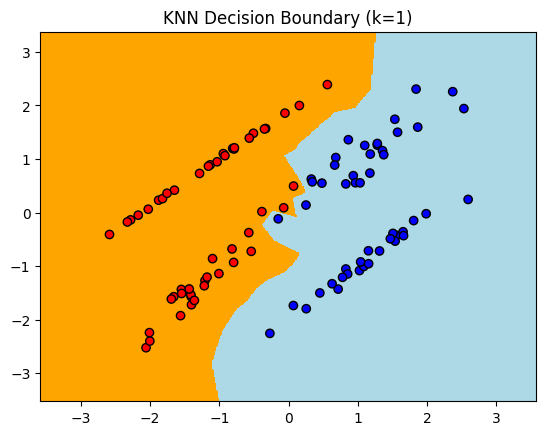

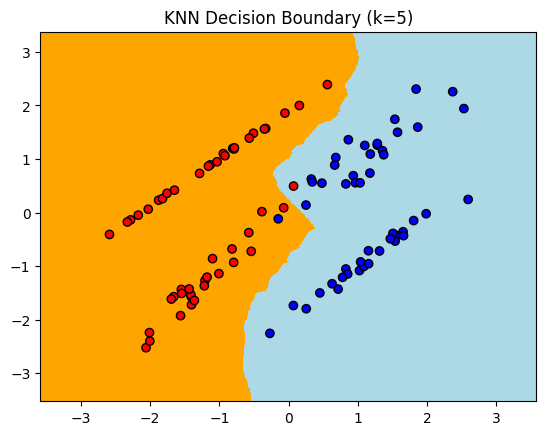

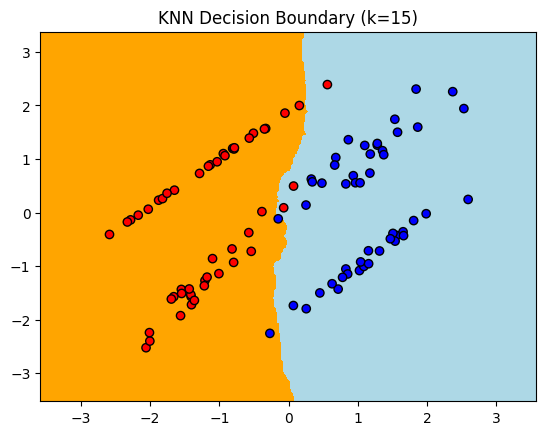

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=42)

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for k in [1, 5, 15]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=ListedColormap(('orange', 'lightblue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('red', 'blue')))
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.show()


25. Apply Feature Scaling before training a KNN model and compare results with unscaled data

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

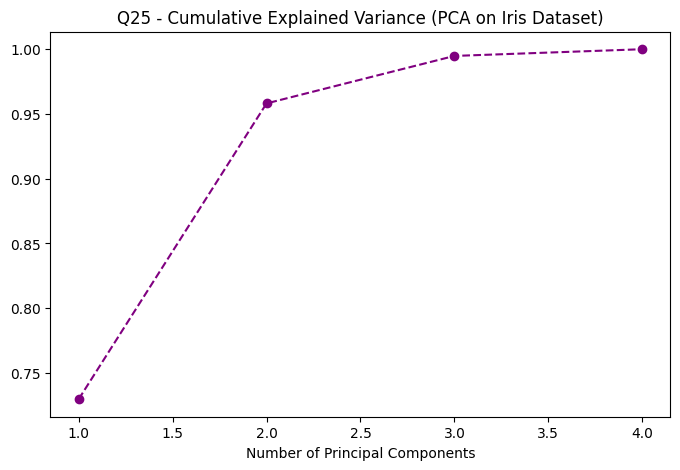

In [35]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load and standardize data
iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=4)
pca.fit(X_scaled)

# Get cumulative explained variance
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), cum_explained_variance, marker='o', linestyle='--', color='purple')
plt.title('Q25 - Cumulative Explained Variance (PCA on Iris Dataset)')
plt.xlabel('Number of Principal Components')
plt.ylabel


26. Train a PCA model on synthetic data and print the explained variance ratio for each component

In [7]:
from sklearn.decomposition import PCA

X, _ = make_classification(n_samples=100, n_features=5, random_state=42)
pca = PCA(n_components=5)
pca.fit(X)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [5.94674217e-01 2.54799657e-01 1.50526126e-01 1.25227371e-16
 0.00000000e+00]


27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

In [36]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and standardize the Iris dataset
iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display shape of reduced dataset
print("Q27 - Shape of PCA-Reduced Data (2D):", X_pca.shape)


Q27 - Shape of PCA-Reduced Data (2D): (150, 2)


28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

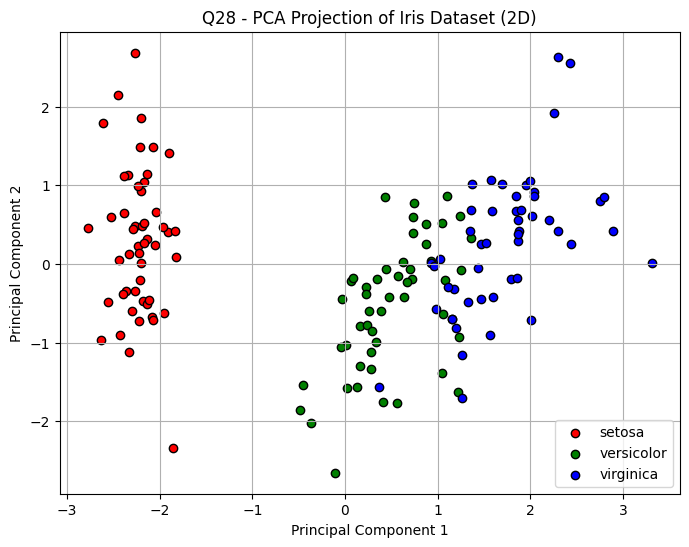

In [37]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the 2D PCA projection
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, color, label in zip(range(3), colors, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=label, edgecolor='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Q28 - PCA Projection of Iris Dataset (2D)')
plt.legend()
plt.grid(True)
plt.show()


29. Train a KNN Classifier and check the number of misclassified samples

In [38]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess the data
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train KNN on PCA-transformed data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Q29 - Accuracy of KNN on 2D PCA-Transformed Iris Data: {accuracy:.4f}")


Q29 - Accuracy of KNN on 2D PCA-Transformed Iris Data: 0.9556


30. Train a PCA model and visualize the cumulative explained variance

In [39]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split original (4D) data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
acc_orig = accuracy_score(y_test, y_pred_orig)

# Apply PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)

# Train KNN on PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Print results
print("Q30 - KNN Accuracy Comparison:")
print(f"Original (4D) Accuracy: {acc_orig:.4f}")
print(f"PCA-reduced (2D) Accuracy: {acc_pca:.4f}")


Q30 - KNN Accuracy Comparison:
Original (4D) Accuracy: 1.0000
PCA-reduced (2D) Accuracy: 0.9556


31. Compare the performance of KNN using raw features vs. PCA-transformed features

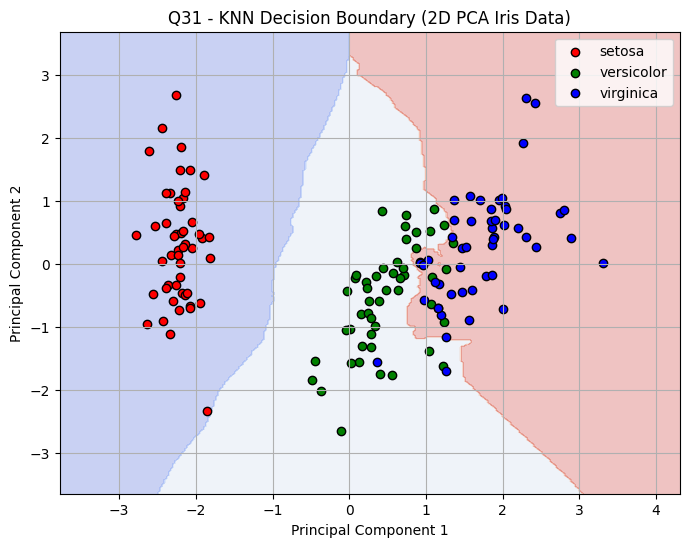

In [40]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Load and preprocess data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)

# Create a meshgrid for plotting decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict on meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
colors = ['red', 'green', 'blue']
for i, color, label in zip(range(3), colors, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=label, edgecolor='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Q31 - KNN Decision Boundary (2D PCA Iris Data)')
plt.legend()
plt.grid(True)
plt.show()


32. Visualize PCA-reduced Iris dataset in 2D with class labels


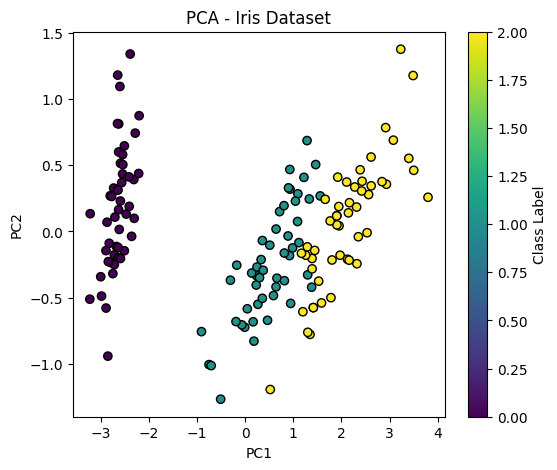

In [13]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_pca = PCA(n_components=2).fit_transform(X_iris)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_iris, cmap='viridis', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Iris Dataset")
plt.colorbar(label='Class Label')
plt.show()


33. Build a KNN pipeline with StandardScaler and PCA using Pipeline

In [41]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and standardize the Iris dataset
iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 1 component
pca = PCA(n_components=1)
X_pca_1d = pca.fit_transform(X_scaled)

# Display explained variance ratio
explained_variance_1d = pca.explained_variance_ratio_
print(f"Q33 - Explained Variance Ratio with 1 Component: {explained_variance_1d[0]:.4f}")


Q33 - Explained Variance Ratio with 1 Component: 0.7296


34. Explain the effect of different PCA components on KNN performance

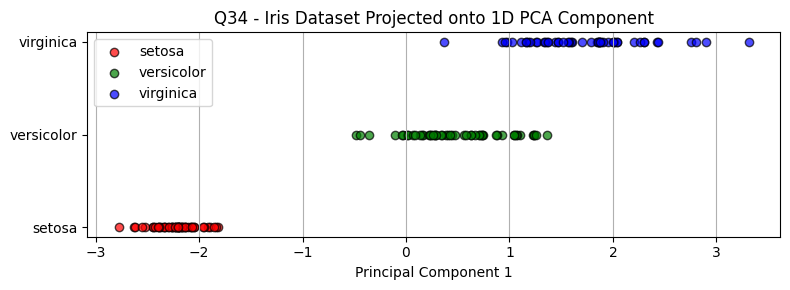

In [42]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and standardize the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 1 component
pca = PCA(n_components=1)
X_pca_1d = pca.fit_transform(X_scaled)

# Visualize 1D projection using a strip plot
plt.figure(figsize=(8, 3))
colors = ['red', 'green', 'blue']
for i, color, label in zip(range(3), colors, target_names):
    plt.scatter(X_pca_1d[y == i], [i]*sum(y == i), color=color, label=label, alpha=0.7, edgecolor='k')

plt.yticks([0, 1, 2], target_names)
plt.xlabel('Principal Component 1')
plt.title('Q34 - Iris Dataset Projected onto 1D PCA Component')
plt.legend()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


35. Implement and visualize PCA on high-dimensional synthetic data (50D to 2D)


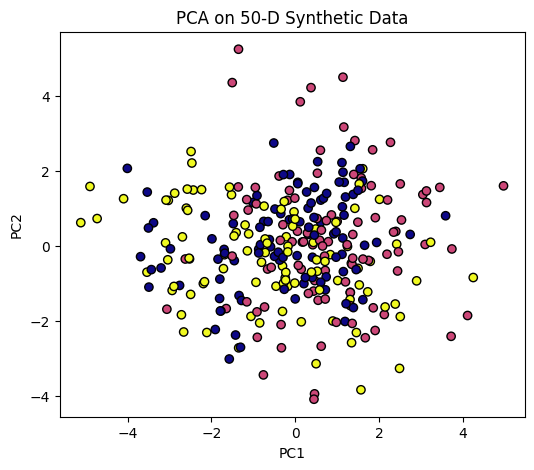

In [16]:
X, y = make_classification(n_samples=300, n_features=50, n_informative=10, n_classes=3, random_state=42)
X_scaled = StandardScaler().fit_transform(X)
X_reduced = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='plasma', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on 50-D Synthetic Data")
plt.show()


36. Compare classification accuracy before and after PCA (numerical comparison only)


In [17]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=3)
knn_no_pca.fit(X_train_scaled, y_train)
acc_no_pca = knn_no_pca.score(X_test_scaled, y_test)

# Train KNN with PCA (2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_with_pca = KNeighborsClassifier(n_neighbors=3)
knn_with_pca.fit(X_train_pca, y_train)
acc_with_pca = knn_with_pca.score(X_test_pca, y_test)

# Print comparison
print("Accuracy without PCA:", acc_no_pca)
print("Accuracy with PCA (2 components):", acc_with_pca)


Accuracy without PCA: 1.0
Accuracy with PCA (2 components): 0.9555555555555556


37. Visualize explained variance for PCA on Iris dataset

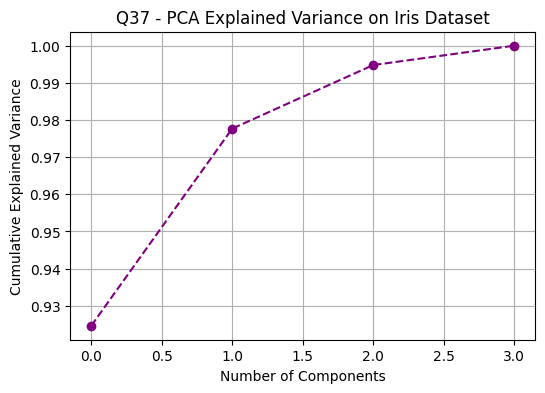

In [18]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply PCA without limiting components to get all explained variances
pca = PCA()
pca.fit(X)

# Plot the cumulative explained variance
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Q37 - PCA Explained Variance on Iris Dataset')
plt.grid(True)
plt.show()


38. Apply PCA to reduce to 2D and classify with KNN (Iris dataset)

In [19]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split after PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# Evaluate accuracy
accuracy = knn.score(X_test_pca, y_test)
print("Q38 - Accuracy using PCA-reduced (2D) features:", accuracy)


Q38 - Accuracy using PCA-reduced (2D) features: 0.9555555555555556


39. Evaluate KNN classifier accuracy using different K values (1–10)

In [20]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate accuracy for different K values from 1 to 10
print("Q39 - KNN Accuracy for K = 1 to 10:")
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_test_scaled, y_test)
    print(f"K = {k}, Accuracy = {accuracy:.4f}")


Q39 - KNN Accuracy for K = 1 to 10:
K = 1, Accuracy = 0.9778
K = 2, Accuracy = 0.9778
K = 3, Accuracy = 1.0000
K = 4, Accuracy = 0.9778
K = 5, Accuracy = 1.0000
K = 6, Accuracy = 1.0000
K = 7, Accuracy = 1.0000
K = 8, Accuracy = 1.0000
K = 9, Accuracy = 1.0000
K = 10, Accuracy = 1.0000


40. Visualize decision boundary of KNN using PCA-transformed features (2D)

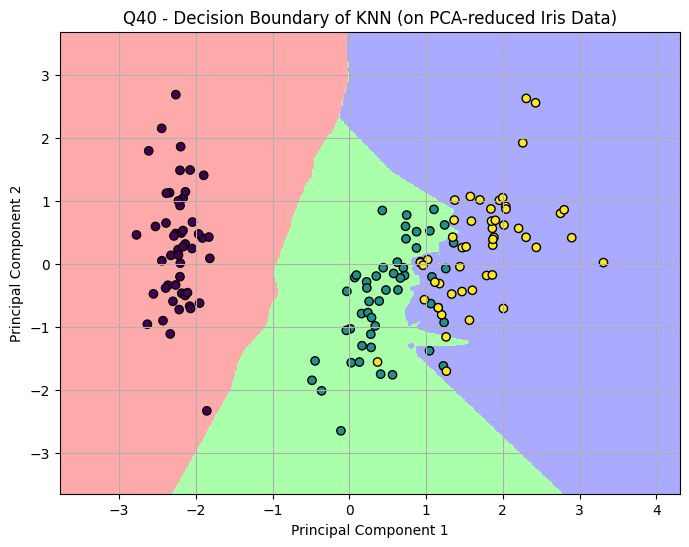

In [21]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train KNN on PCA data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Create mesh grid for plotting decision boundary
h = .02  # step size
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Q40 - Decision Boundary of KNN (on PCA-reduced Iris Data)")
plt.grid(True)
plt.show()


41. Apply PCA to the dataset and visualize it in 2D using a scatter plot

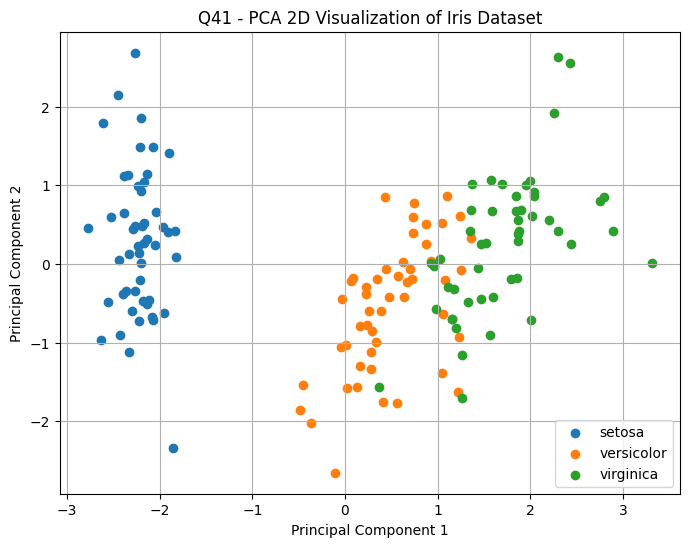

In [22]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot
plt.figure(figsize=(8, 6))
for target_index, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == target_index, 0],
                X_pca[y == target_index, 1],
                label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Q41 - PCA 2D Visualization of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


42. Visualize decision boundary in original (non-PCA) feature space using first two features

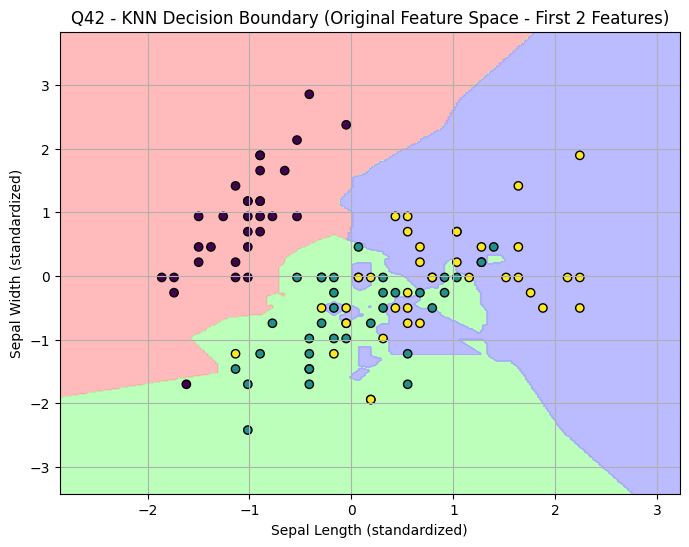

In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset and use only the first two features
iris = load_iris()
X = iris.data[:, :2]  # Only first two features: sepal length & sepal width
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Create mesh grid for plotting
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Q42 - KNN Decision Boundary (Original Feature Space - First 2 Features)')
plt.grid(True)
plt.show()


43. Compute and display confusion matrix for KNN classification (with PCA)

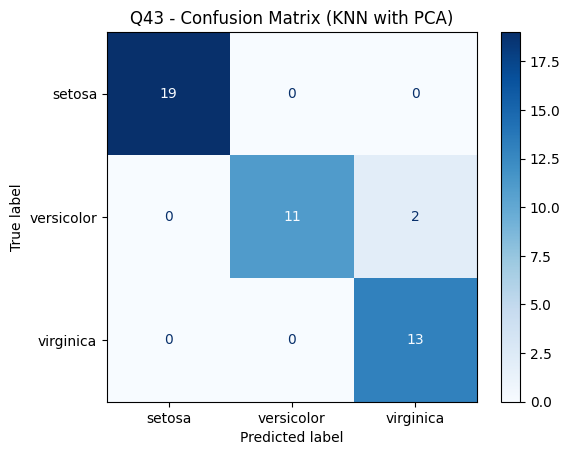

In [26]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and compute confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Q43 - Confusion Matrix (KNN with PCA)')
plt.grid(False)
plt.show()


44. Display classification report for KNN after PCA transformation

In [28]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Print classification report
print(" Classification Report (KNN after PCA):")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


 Classification Report (KNN after PCA):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



45.  Compare KNN classifier accuracy before and after PCA

In [30]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ---------- KNN without PCA ----------
knn_full = KNeighborsClassifier(n_neighbors=3)
knn_full.fit(X_train_full, y_train)
y_pred_full = knn_full.predict(X_test_full)
acc_full = accuracy_score(y_test, y_pred_full)

# ---------- KNN with PCA ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Print accuracy comparison
print("KNN Accuracy Comparison:")
print(f"Without PCA: {acc_full:.4f}")
print(f"With PCA   : {acc_pca:.4f}")


KNN Accuracy Comparison:
Without PCA: 1.0000
With PCA   : 0.9556


46. Plot accuracy vs number of neighbors (K) using PCA-transformed data

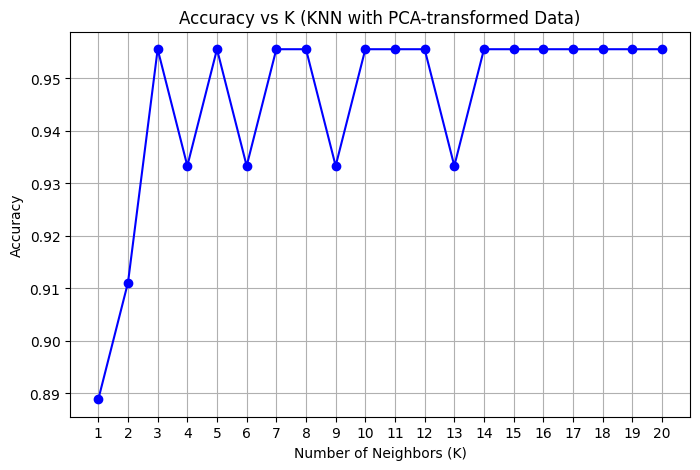

In [31]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Try different values of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.xticks(k_values)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K (KNN with PCA-transformed Data)')
plt.grid(True)
plt.show()


47. Identify optimal value of K using cross-validation on PCA-transformed data

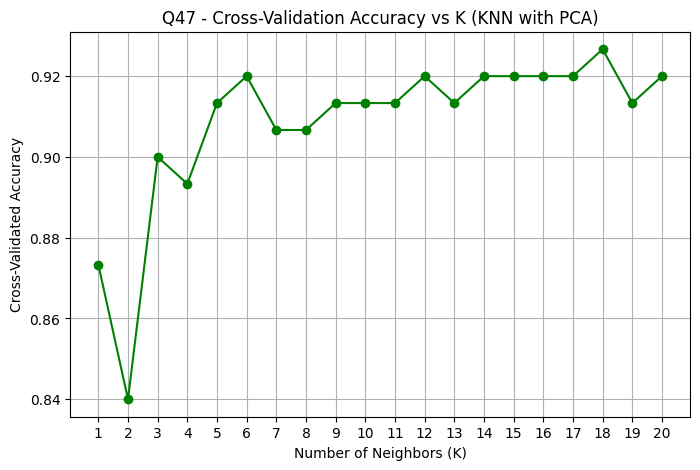

Best K: 18 with average accuracy: 0.9267


In [32]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cross-validation to find best K
k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_pca, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best K
best_k = np.argmax(cv_scores) + 1
best_score = max(cv_scores)

# Plot cross-validation results
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o', linestyle='-', color='green')
plt.xticks(k_range)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Q47 - Cross-Validation Accuracy vs K (KNN with PCA)')
plt.grid(True)
plt.show()

# Print best K
print(f"Best K: {best_k} with average accuracy: {best_score:.4f}")


48. Train final KNN classifier using optimal K (from Q47) on PCA data and evaluate performance

In [33]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load and preprocess data
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Use optimal K from Q47 (e.g., let's say it was 7)
optimal_k = 7
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)

# Predict on test set
y_pred = knn_final.predict(X_test)

# Evaluate model
print("Final KNN Evaluation (Optimal K with PCA):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Final KNN Evaluation (Optimal K with PCA):
Accuracy: 0.9556

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

